In [102]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [103]:
df=pd.read_csv('pollution_dataset.csv')

In [104]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [106]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.464580,60.068140,29.905580,40.003700,21.00036,15.141060,0.904314,5.031880,299.948200
std,5.486219,15.044806,30.285899,30.693124,11.30099,7.668466,0.297840,5.010352,17.215133
min,3.500000,10.000000,0.000000,-1.400000,-13.50000,0.000000,-0.080000,0.000000,243.000000
25%,21.800000,49.900000,8.500000,18.900000,13.80000,9.900000,0.700000,1.500000,288.000000
50%,25.300000,60.200000,20.600000,31.100000,20.50000,15.100000,0.905000,3.500000,300.000000
75%,28.900000,70.100000,41.500000,51.500000,27.50000,20.400000,1.100000,6.900000,311.000000
max,46.200000,100.000000,249.000000,256.100000,96.40000,41.700000,2.140000,46.300000,358.000000


In [107]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [108]:
df.duplicated().sum()

0

In [109]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor


In [110]:
df['Air Quality'].nunique()

4

Text(0, 0.5, 'CO')

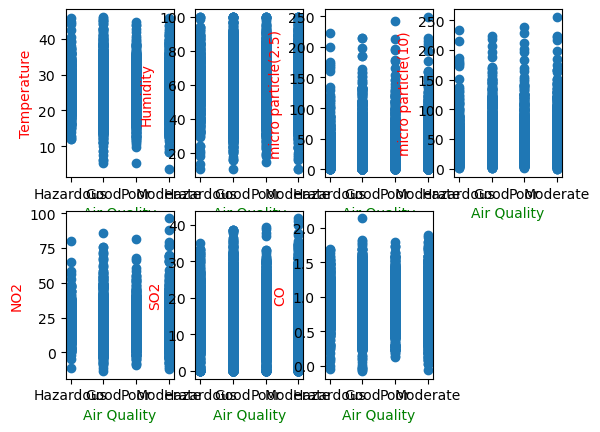

In [111]:
x0=df['Air Quality']
y0=df['Temperature']
plt.subplot(2,4,1)
plt.scatter(x0,y0)
plt.xlabel('Air Quality',color='green')
plt.ylabel('Temperature', color='red')

x1=df['Air Quality']
y1=df['Humidity']
plt.subplot(2,4,2)
plt.scatter(x1,y1)
plt.xlabel('Air Quality',color='green')
plt.ylabel('Humidity', color='red')

x2=df['Air Quality']
y2=df['PM2.5']
plt.subplot(2,4,3)
plt.scatter(x2,y2)
plt.xlabel('Air Quality',color='green')
plt.ylabel('micro particle(2.5)', color='red')

x3=df['Air Quality']
y3=df['PM10']
plt.subplot(2,4,4)
plt.scatter(x3,y3)
plt.xlabel('Air Quality',color='green')
plt.ylabel('micro particle(10)', color='red')

x4=df['Air Quality']
y4=df['NO2']
plt.subplot(2,4,5)
plt.scatter(x4,y4)
plt.xlabel('Air Quality',color='green')
plt.ylabel('NO2', color='red')

x5=df['Air Quality']
y5=df['SO2']
plt.subplot(2,4,6)
plt.scatter(x5,y5)
plt.xlabel('Air Quality',color='green')
plt.ylabel('SO2', color='red')

x6=df['Air Quality']
y6=df['CO']
plt.subplot(2,4,7)
plt.scatter(x6,y6)
plt.xlabel('Air Quality',color='green')
plt.ylabel('CO', color='red')

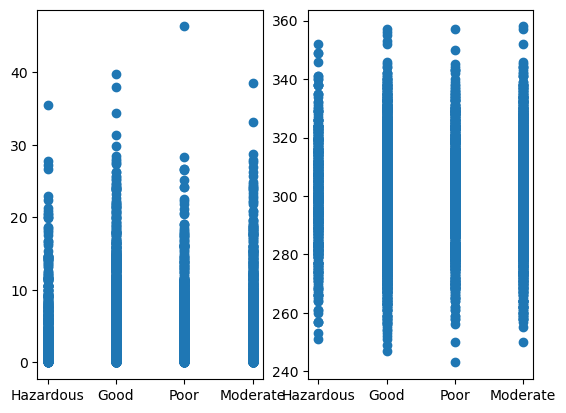

In [112]:
Proximity=df['Proximity_to_Industrial_Areas']
population=df['Population_Density']
air=df['Air Quality']

plt.subplot(1,2,1)
plt.scatter(air,Proximity)

plt.subplot(1,2,2)
plt.scatter(air,population)
plt.show()

In [113]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,27.2,51.7,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,26.3,59.3,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,27.9,73.2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,23.9,51.9,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,25.2,59.0,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor


<Axes: xlabel='Air Quality'>

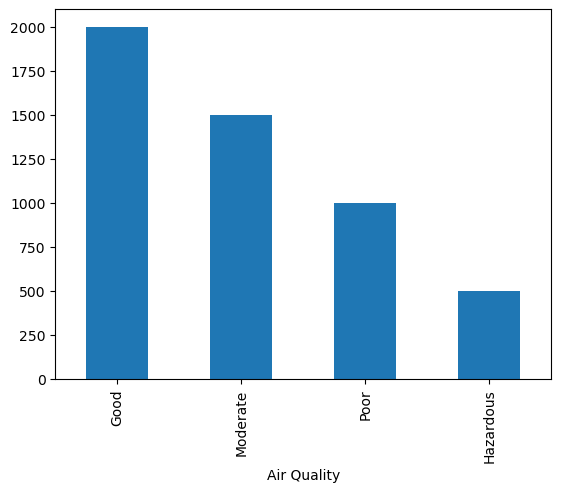

In [114]:
df['Air Quality'].value_counts().plot.bar()

In [115]:
good=df[df['Air Quality']=='Good']
Hazardous=df[df['Air Quality']=='Hazardous']

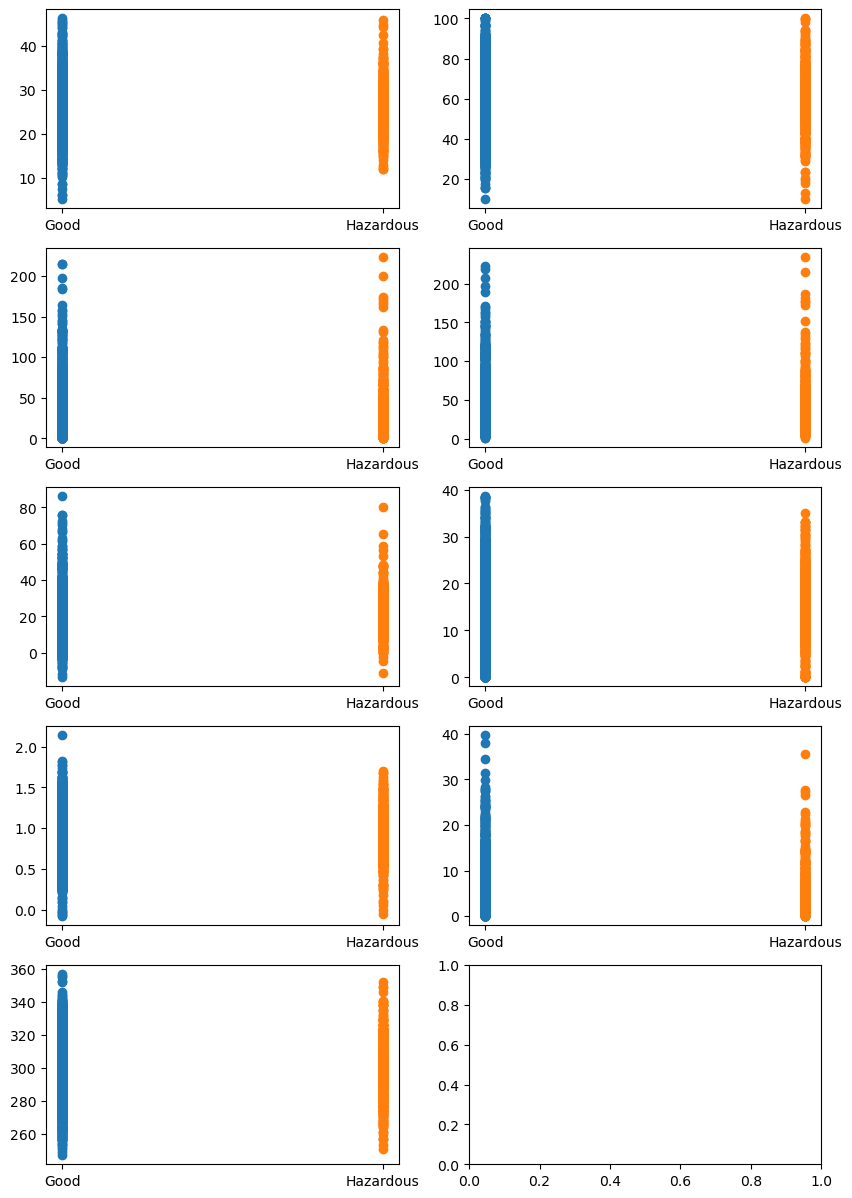

In [116]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

plt.subplot(5,2,1)
plt.scatter(good['Air Quality'],good['Temperature'])
plt.scatter(Hazardous['Air Quality'],Hazardous['Temperature'])

plt.subplot(5,2,2)
plt.scatter(good['Air Quality'],good['Humidity'])
plt.scatter(Hazardous['Air Quality'],Hazardous['Humidity'])

plt.subplot(5,2,3)
plt.scatter(good['Air Quality'],good['PM2.5'])
plt.scatter(Hazardous['Air Quality'],Hazardous['PM2.5'])

plt.subplot(5,2,4)
plt.scatter(good['Air Quality'],good['PM10'])
plt.scatter(Hazardous['Air Quality'],Hazardous['PM10'])

plt.subplot(5,2,5)
plt.scatter(good['Air Quality'],good['NO2'])
plt.scatter(Hazardous['Air Quality'],Hazardous['NO2'])

plt.subplot(5,2,6)
plt.scatter(good['Air Quality'],good['SO2'])
plt.scatter(Hazardous['Air Quality'],Hazardous['SO2'])

plt.subplot(5,2,7)
plt.scatter(good['Air Quality'],good['CO'])
plt.scatter(Hazardous['Air Quality'],Hazardous['CO'])

plt.subplot(5,2,8)
plt.scatter(good['Air Quality'],good['Proximity_to_Industrial_Areas'])
plt.scatter(Hazardous['Air Quality'],Hazardous['Proximity_to_Industrial_Areas'])

plt.subplot(5,2,9)
plt.scatter(good['Air Quality'],good['Population_Density'])
plt.scatter(Hazardous['Air Quality'],Hazardous['Population_Density'])

In [118]:
label_encode=LabelEncoder()
df['Air Quality'] = label_encode.fit_transform(df['Air Quality'])

In [124]:
x=df.drop(columns=['Air Quality'])
y=df['Air Quality']

In [132]:
x.shape

(5000, 9)

In [134]:
y.shape

(5000,)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [138]:
from sklearn.tree import DecisionTreeClassifier
des_tree = DecisionTreeClassifier(random_state=42)
des_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [140]:
tree_pred = des_tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f'Accuracy Score: {tree_accuracy:.4f}')
tree_report= classification_report(y_test, tree_pred)
tree_conf_matrix= confusion_matrix(y_test, tree_pred)
print(f'report: {tree_report}')
print(f'conf_matrix: {tree_conf_matrix}')

Accuracy Score: 0.3080
report:               precision    recall  f1-score   support

           0       0.39      0.39      0.39       591
           1       0.07      0.09      0.08       152
           2       0.36      0.35      0.35       474
           3       0.19      0.18      0.18       283

    accuracy                           0.31      1500
   macro avg       0.25      0.25      0.25      1500
weighted avg       0.31      0.31      0.31      1500

conf_matrix: [[233  79 168 111]
 [ 68  13  36  35]
 [183  51 165  75]
 [113  32  87  51]]


random forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [145]:
ran_pred = random_forest.predict(x_test)
ran_accuracy = accuracy_score(y_test, ran_pred)
ran_report= classification_report(y_test, ran_pred)
ran_conf_matrix= confusion_matrix(y_test, ran_pred)
print(f'Accuracy Score: {ran_accuracy:.4f}')
print(f'report: {ran_report}')
print(f'conf_matrix: {ran_conf_matrix}')

Accuracy Score: 0.3780
report:               precision    recall  f1-score   support

           0       0.39      0.85      0.53       591
           1       0.00      0.00      0.00       152
           2       0.31      0.13      0.18       474
           3       0.40      0.01      0.01       283

    accuracy                           0.38      1500
   macro avg       0.28      0.25      0.18      1500
weighted avg       0.33      0.38      0.27      1500

conf_matrix: [[504   0  85   2]
 [129   0  23   0]
 [412   0  61   1]
 [256   0  25   2]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


naive bayes

In [154]:
from sklearn.naive_bayes import GaussianNB
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

GaussianNB()

In [156]:
bays_pred = Bayes_model.predict(x_test)

bays_accuracy = accuracy_score(y_test, bays_pred)
print(f'Accuracy Score: {bays_accuracy:.4f}')
print(classification_report(y_test, bays_pred))
print(confusion_matrix(y_test, bays_pred))

Accuracy Score: 0.3787
              precision    recall  f1-score   support

           0       0.39      0.90      0.55       591
           1       0.06      0.01      0.02       152
           2       0.35      0.05      0.09       474
           3       0.18      0.03      0.05       283

    accuracy                           0.38      1500
   macro avg       0.25      0.25      0.18      1500
weighted avg       0.31      0.38      0.26      1500

[[534   9  27  21]
 [142   2   6   2]
 [421  13  23  17]
 [256   8  10   9]]
